<a href="https://colab.research.google.com/github/malick08012/Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


#Upload Data Set

In [ ]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


#Load Data Set

In [ ]:


# Load the uploaded CSV
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Select Relevant Features & Preprocess Data

In [ ]:
# Selecting features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Find Optimal Number of Clusters (Elbow Method)

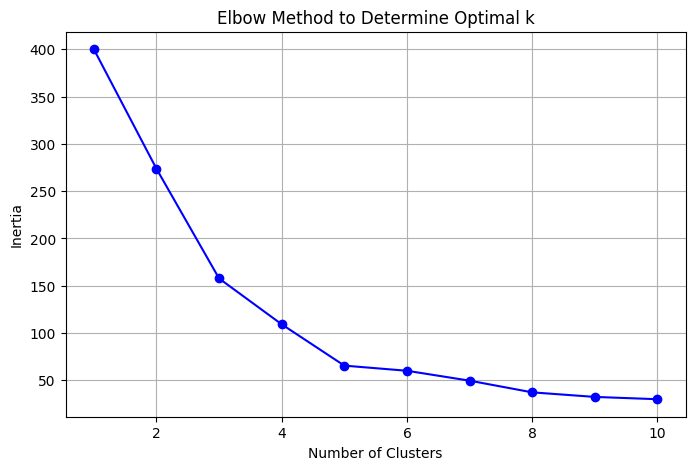

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


#Apply K-Means with Optimal Number of Clusters

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


#Visualize Clusters in 2D using PCA

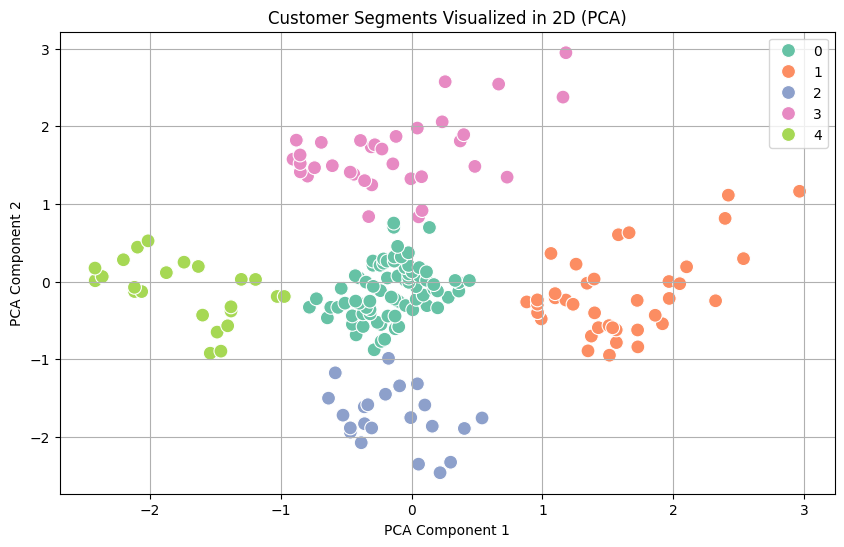

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments Visualized in 2D (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


#Interpret the Results

In [ ]:
# Grouping by cluster to see average behavior
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


#Key Findings
Using the Elbow Method the optimal number of clusters was determined to be 5

Cluster 0: Average income, moderate spending — balanced spenders.

Cluster 1: High income, high spending — ideal customers (likely loyal and profitable).

Cluster 2: Low income, high spending — value shoppers (price-conscious but engaged).

Cluster 3: High income, low spending — potential customers (need better targeting).

Cluster 4: Low income, low spending — low value customers (minimal engagement).

#Customer Segmentation:

Segmentation helps the business understand different customer types and personalize marketing strategies accordingly.

#Dimensionality Reduction:

Used PCA to reduce features to 2D for better visualization.

